OBJECTIVE

To identify trends to improve customer satisfaction, reduce risks and drive business growth

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('Banking_Database.csv')
df.head(5)

,Customer ID,First Name,Last Name,Age,Gender,Address,City,Contact Number,Email,Account Type,...,Minimum Payment Due,Payment Due Date,Last Credit Card Payment Date,Rewards Points,Feedback ID,Feedback Date,Feedback Type,Resolution Status,Resolution Date,Anomaly
0,1,Joshua,Hall,45,Male,Address_1,Fort Worth,19458794854,joshua.hall@kag.com,Current,...,226.22,11/26/2023,3/20/2023,8142,1,10/6/2023,Suggestion,Resolved,1/22/2023,1
1,2,Mark,Taylor,47,Female,Address_2,Louisville,19458794855,mark.taylor@kag.com,Current,...,42.84,11/5/2023,6/16/2023,4306,2,4/7/2023,Complaint,Resolved,8/27/2023,1
2,3,Joseph,Flores,25,Female,Address_3,Philadelphia,19458794856,joseph.flores@kag.com,Current,...,162.12,1/8/2023,3/20/2023,4842,3,9/7/2023,Praise,Pending,5/11/2023,1
3,4,Kevin,Lee,52,Other,Address_4,Oklahoma City,19458794857,kevin.lee@kag.com,Savings,...,216.46,9/8/2023,10/15/2023,9463,4,5/28/2023,Complaint,Resolved,7/5/2023,1
4,5,Linda,Johnson,68,Other,Address_5,Phoenix,19458794858,linda.johnson@kag.com,Savings,...,1.29,3/4/2023,7/27/2023,2209,5,2/12/2023,Complaint,Resolved,11/21/2023,1


1. Account Opening Trend Analysis
- Analyze the number of account openings per month to identify peak periods. This can help optimize marketing campaigns and staffing based on demand.

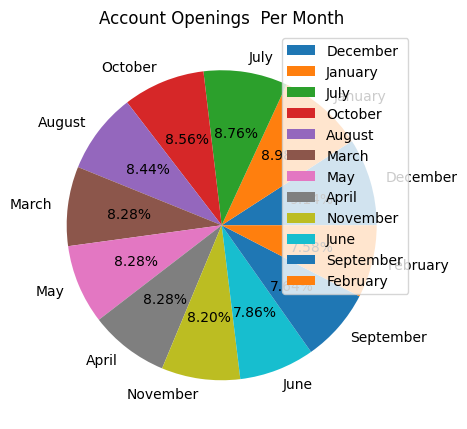

In [8]:
df['Date Of Account Opening'] = pd.to_datetime(df['Date Of Account Opening'],errors="coerce")
df['Month'] = df['Date Of Account Opening'].dt.month_name()
monthly_account_openings = df['Month'].value_counts()
plt.figure(figsize=(5,16))
plt.pie(monthly_account_openings,labels=monthly_account_openings.index,autopct="%2.2f%%")
plt.title("Account Openings  Per Month")
plt.legend()
plt.show()

2. Customer Profiling
- Divide customers based on data such as `Age`, `Gender`, and `City` to understand different customer groups. This helps tailor personalized financial products and services.

/tmp/ipython-input-3464832248.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group = df.groupby('AgeGroup').count()


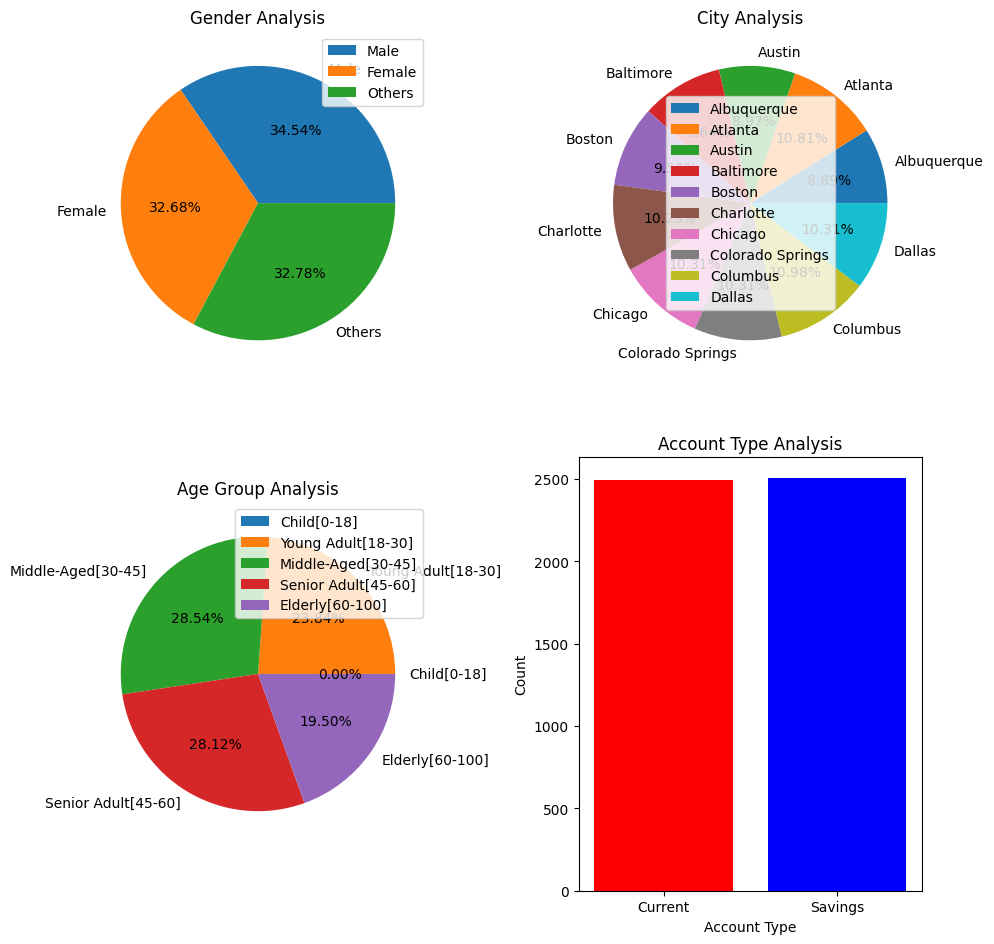

In [9]:
# gruop customers based on age
bins = [0,18,30,45,60,100]
labels = ['Child[0-18]', 'Young Adult[18-30]', 'Middle-Aged[30-45]', 'Senior Adult[45-60]', 'Elderly[60-100]']

df['AgeGroup'] = pd.cut(df['Age'],bins = bins,labels = labels,right = False)

age_group = df.groupby('AgeGroup').count()
fig,axs = plt.subplots(2,2,figsize = (10,10))
gender = df.groupby("Gender").count()
label = ['Male','Female','Others']
axs[0,0].pie(gender.Age,labels = label,autopct = "%2.2f%%")
axs[0,0].set_title("Gender Analysis")
axs[0,0].legend()


city = df.groupby("City").count()
c = city.head(10)
axs[0,1].pie(c.Age,labels = c.index,autopct = "%2.2f%%")
axs[0,1].set_title("City Analysis")
axs[0,1].legend()


axs[1,0].pie(age_group.Age,labels = labels,autopct = "%2.2f%%")
axs[1,0].set_title("Age Group Analysis")
axs[1,0].legend()

account = df.groupby("Account Type").count()
axs[1,1].bar(account.index,account.Age,color = ['r','b'])
axs[1,1].set_title("Account Type Analysis")
axs[1,1].set_xlabel("Account Type")
axs[1,1].set_ylabel("Count")


plt.tight_layout()
plt.show()

3. Transaction Behavior Insights
- Study `Transaction Amount` and `Transaction Type` over quarters to identify spending habits, enabling targeted offers such as loans or credit cards.

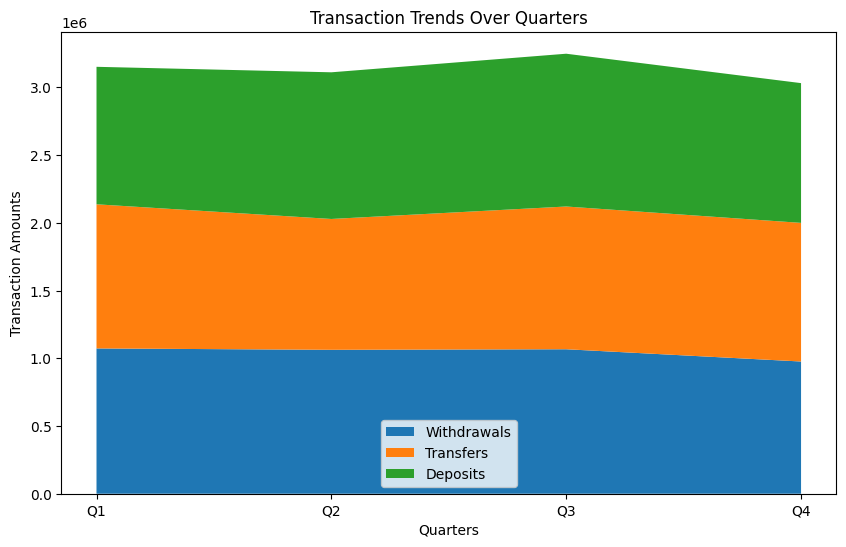

In [10]:
# Finding the different types of Transactions
transactFrame = pd.DataFrame(data = df, columns = ['Transaction Date', 'Transaction Type', 'Transaction Amount'])
transactTypes = transactFrame['Transaction Type'].unique()

# Finding the total monthly transaction for each type
transDict = {transactionType: dict() for transactionType in transactTypes}
for transactionType in transactTypes:
    monthlyTransact = transactFrame[transactFrame['Transaction Type'] == transactionType]
    monthlyList = []
    for i, row in monthlyTransact.iterrows():
        # Extracting month from string date
        x = row['Transaction Date']
        monthlyList.append((int(x[:x.index('/')]), row['Transaction Amount']))

    monthlyDict = {i : 0 for i in range(1,13)}
    for elem in monthlyList:
        monthlyDict[elem[0]] += elem[1]
    transDict[transactionType] = monthlyDict

month_to_quarter = {
    1: 1, 2: 1, 3: 1,
    4: 2, 5: 2, 6: 2,
    7: 3, 8: 3, 9: 3,
    10: 4, 11: 4, 12: 4
}

# Converting months to quarters
quarterSum = {i: {transactionType: 0 for transactionType in transactTypes} for i in range(1, 5)}
for transactionType, monthlyDict in transDict.items():
    for month, amount in monthlyDict.items():
        quarter = month_to_quarter[month]
        quarterSum[quarter][transactionType] += amount


# Plotting stackplot
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
withdrawals = [quarterSum[i]['Withdrawal'] for i in range(1,5)]
transfers = [quarterSum[i]['Transfer'] for i in range(1,5)]
deposits = [quarterSum[i]['Deposit'] for i in range(1,5)]

plt.figure(figsize=(10,6))
plt.stackplot(quarters, withdrawals, transfers, deposits, labels = ['Withdrawals','Transfers','Deposits'])

plt.xlabel('Quarters')
plt.ylabel('Transaction Amounts')
plt.title('Transaction Trends Over Quarters')
plt.legend()

plt.show()

4. Credit Card Usage Patterns
- Analyze `Credit Type on gender`, `Credit usage ratio`, and `credit card Payment Due` to determine customer credit card usage patterns. This helps in adjusting credit limits for timely payments.

<BarContainer object of 3 artists>

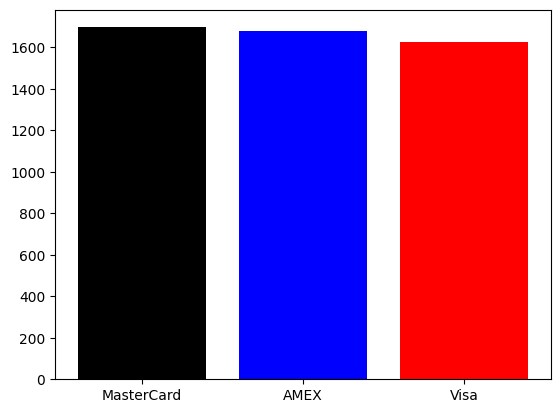

In [11]:
df2=df['Card Type'].value_counts()
x=df2.index
y=df2.values
plt.bar(x,y,color=["black","Blue","Red"])

Text(0, 0.5, 'Count')

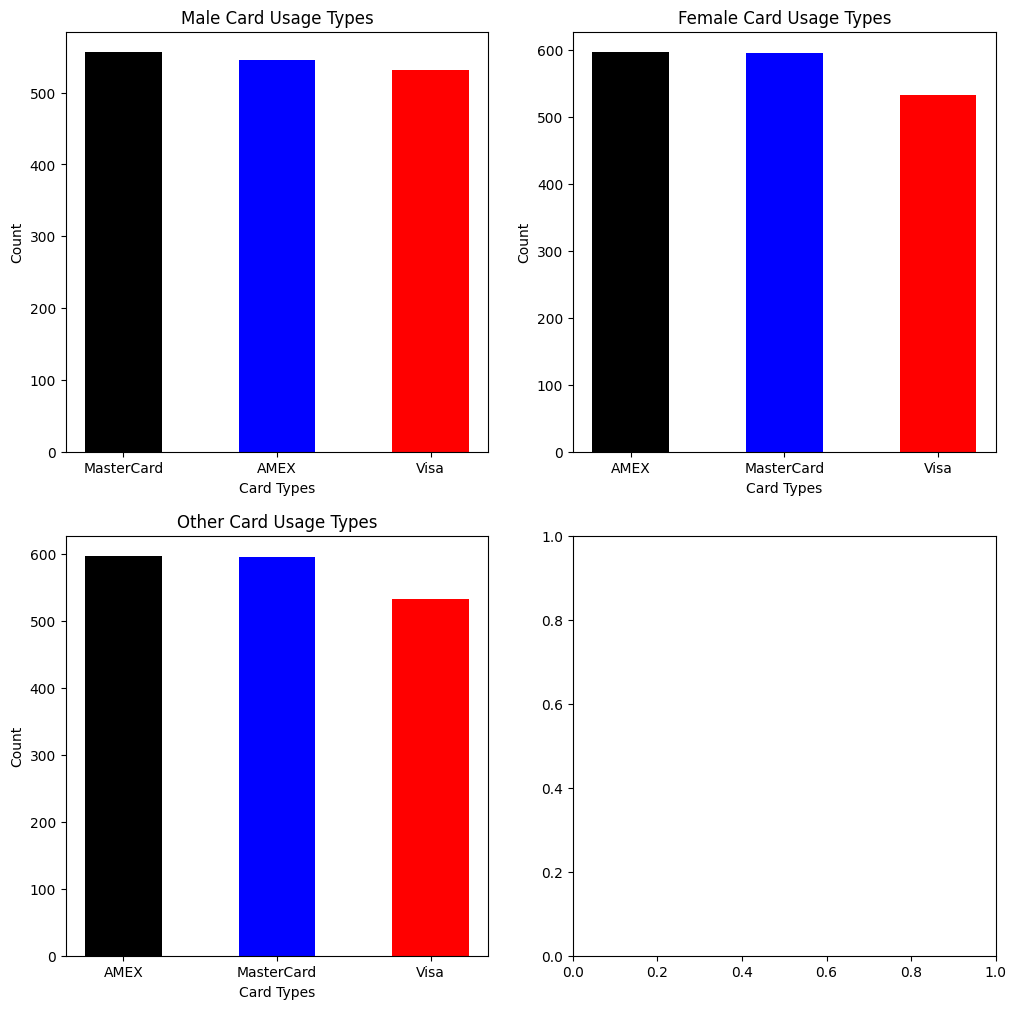

In [12]:
male=df["Card Type"][df["Gender"]=="Male"].value_counts()
male_data=pd.DataFrame(male)
m_x=male.index
m_y=male.values
male_data
female=df["Card Type"][df["Gender"]=="Female"].value_counts()
female_data=pd.DataFrame(female)
f_x=female.index
f_y=female.values
female_data
others=df["Card Type"][df["Gender"]=="Other"].value_counts()
others
other_data=pd.DataFrame(others)
o_x=others.index
o_y=others.values
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes[0][0].bar(m_x,m_y,color=["black","blue","red"],width=0.5)
axes[0][0].set_title("Male Card Usage Types")
axes[0][0].set_xlabel("Card Types")
axes[0][0].set_ylabel("Count")

axes[0][1].bar(f_x,f_y,color=["black","blue","red"],width=0.5)
axes[0][1].set_title("Female Card Usage Types")
axes[0][1].set_xlabel("Card Types")
axes[0][1].set_ylabel("Count")

axes[1][0].bar(f_x,f_y,color=["black","blue","red"],width=0.5)
axes[1][0].set_title("Other Card Usage Types")
axes[1][0].set_xlabel("Card Types")
axes[1][0].set_ylabel("Count")

In [13]:
plt.figure(figsize=(10,8))
plt.hist(df["usage_ratio"],bins=30,color="skyblue",edgecolor="black")
plt.xlabel('Usage Ratio')
plt.ylabel('Frequency')
plt.title('Distribution of Usage Ratio')
plt.show()

KeyError: 'usage_ratio'

<Figure size 1000x800 with 0 Axes>

In [ ]:
over_limit=df[df["usage_ratio"]>1]
in_limit=df[df["usage_ratio"]<=1]
print(over_limit["Customer ID"].count())
print(in_limit["Customer ID"].count())
x=[]
x.append(over_limit["Customer ID"].count())
x.append(in_limit["Customer ID"].count())
print(x)
limit=["Over Limit","In Limit"]
plt.bar(limit,x,color=["red","green"])
plt.xlabel("Limit")
plt.ylabel("Count")
plt.show()

5. Customer Satisfaction and Feedback
- Analyze `Feedback Type` and `Resolution Status` to evaluate customer satisfaction and identify areas for improvement in customer service. Tracking the time and effectiveness of resolutions can enhance overall service quality.

In [ ]:
feedback_type=df['Feedback Type'].unique()

resolved=[]
pending=[]
for ty in feedback_type:
    temp=df[df['Feedback Type']==ty]
    resolved.append(len(temp[temp['Resolution Status']=='Resolved']))
    pending.append(len(temp[temp['Resolution Status']=='Pending']))
print(resolved)
print(pending)

x=np.arange(3)
plt.bar(x-0.1, resolved,width=0.2, label='Resolved', color='g')
plt.bar(x+0.1, pending,width=0.2, label='Pending', color='r')
plt.xticks(x,feedback_type)
plt.xlabel("Feedback Type")
plt.ylabel("No of Feedbacks")
plt.title("Feedback Status")
plt.legend()
plt.show()

6. Loan Approval/Rejection Analysis
- Analyze the `Loan Status` (approval, rejection, closed) across the different loan types to optimize loan processing strategies.

In [ ]:
loan_type_summary = df.groupby(['Loan Type', 'Loan Status']).size().unstack()

loan_types = loan_type_summary.index
approved_counts = loan_type_summary.get('Approved', 0)
rejected_counts = loan_type_summary.get('Rejected', 0)
closed_counts = loan_type_summary.get('Closed', 0)

x = np.arange(len(loan_types))

bar_width = 0.25

plt.bar(x - bar_width, approved_counts, bar_width, label='Approved', color='green')
plt.bar(x, rejected_counts, bar_width, label='Rejected', color='red')
plt.bar(x + bar_width, closed_counts, bar_width, label='Closed', color='blue')

plt.xlabel('Loan Type')
plt.ylabel('Count of Loans')
plt.title('Loan Approval/Rejection by Loan Type')
plt.xticks(x, loan_types)
plt.legend(title='Loan Status')

plt.show()

In [ ]:
7. Fraud and Anomaly Detection
- Leverage the `Anomaly` column to identify the age group that causes more anomalous transactions.

In [ ]:
# Plotting Transaction Amounts by Anomaly Status
plt.figure(figsize=(8, 6))
for label in [-1, 1]:
    subset = df[df['Anomaly'] == label]
    plt.hist(subset['Age'], bins=30, alpha=0.5, label=f'Anomaly = {label}')

plt.title('Age Distribution by Anomaly Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

8. Branch Performance Analysis
- Analyze account creations by `Branch ID` to evaluate branch performance enabling more focused resources and marketing in underperforming branches.

In [ ]:
# number of accounts in each branch
branch = df.groupby('Branch ID').count()
b = branch.head(10)
ID = list(b.index)
count = list(b.Age)
import matplotlib.pyplot as plt

plt.barh(ID,count,color = ['r','b','g','y'])
plt.xlabel("Accounts")
plt.ylabel("Branch ID")
plt.title("Accounts in Each Branch")
plt.show()